<a href="https://colab.research.google.com/github/crystalmaster/project-worldcup/blob/master/Pha_Team_6_World_Cup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 6 - World Cup

![](https://img.fifa.com/image/upload/t_l4/v1543921822/ex1ksdevyxwsgu7rzdv6.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/abecklas/fifa-world-cup)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- Is there a way to integrate the data from all 3 datasets?
- It seems like the `winners` dataset doesn't have data of World Cup 2018. Can you Google the relevant information and add it to the dataset using `pandas`?
- The format of some number columns in `matches` dataset doesn't look right.
- Can you seperate the Date and the Time of `Datetime` column in `matches` dataset?
- And more...

#Link Google Data Studio

https://datastudio.google.com/reporting/1iQem9Zepg1QhfuLNqp2Vivf26R9vnob6/page/HRrx

#Cleaning data


In [1]:
#Load dataset from google drive
!pip install -U -q PyDrive
#Install gg data studio
!pip install --upgrade -q gspread
!pip install gspread oauth2client


     |████████████████████████████████| 993kB 2.8MB/s 


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import get_as_dataframe, set_with_dataframe 

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
gc = gspread.authorize(GoogleCredentials.get_application_default()) #grant access to google drive 

In [0]:
id = ''.join('https://drive.google.com/open?id=1-ZheYx3sfsMEZ_b0IfPF1LU2vg4qxb0I'.split("=")[1:])#matches.csv

matches = drive.CreateFile({'id':id}) 
matches.GetContentFile('matches.csv')

id = ''.join('https://drive.google.com/open?id=1aMtsi5nbUiSSoBBh0nvATE5VH3JATYPX'.split("=")[1:])
winners = drive.CreateFile({'id':id}) 
winners.GetContentFile('winners.csv')

df = pd.read_csv('matches.csv',encoding='utf-8')
sf = pd.read_csv('matches.csv',encoding='utf-8')

In [45]:
df.head()


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [8]:
df.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [9]:
df.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [0]:
df = df.dropna()

In [11]:
df.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [12]:
df.duplicated().sum()

15

In [0]:
df = df.drop_duplicates(subset="MatchID",keep="first")

In [14]:
df.duplicated().sum()

0

In [41]:
sf.isnull().sum()
sf.head()
sf = sf.dropna()
sf = sf.drop_duplicates(subset="MatchID",keep="first")
sf.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


Total attendence of world cups by year

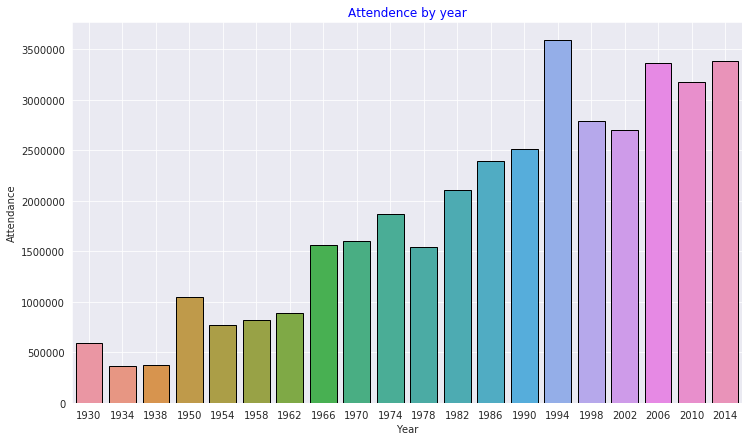

In [15]:
df1 = df.groupby("Year")["Attendance"].sum().reset_index()
df1["Year"] = df1["Year"].astype(int)

sns.set_style("darkgrid")
plt.figure(figsize=(12,7))
sns.barplot(df1["Year"],df1["Attendance"],linewidth=1,edgecolor="k"*len(df1))
plt.grid(True)
plt.title("Attendence by year",color='b')
plt.show()

Average attendence by year

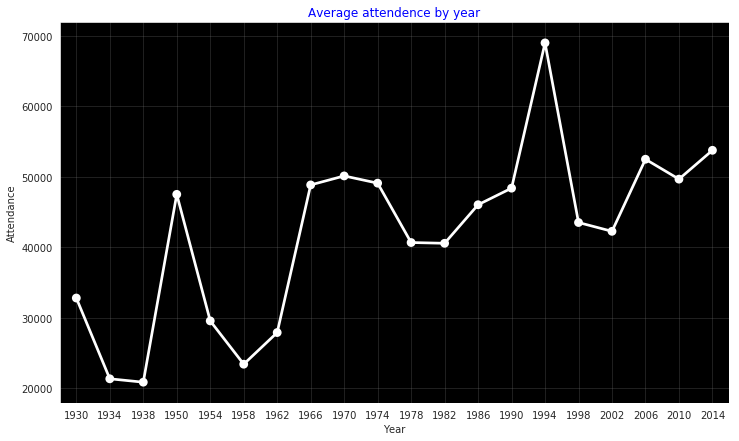

In [16]:
df2 = df.groupby("Year")["Attendance"].mean().reset_index()
df2["Year"] = df2["Year"].astype(int)

plt.figure(figsize=(12,7))
ax = sns.pointplot(df2["Year"],df2["Attendance"],color="w")
ax.set_facecolor("k")
plt.grid(True,color="grey",alpha=.3)
plt.title("Average attendence by year",color='b')
plt.show()


In [0]:
def create_new_worksheet(path='worksheet', sheets={"sheet1":""}):
#     if check_exists(path):
#         print('create_new_worksheet(): File exists')
#         return gc.open(path)
    sh = gc.create(path)
    for name, cols in sheets.items():
        sh.add_worksheet(title=name, rows="100", cols="100")
        sh.values_update(
            name + '!A1',
            params={'valueInputOption': 'RAW'},
            body={'values': [cols]}
        )      
    sh.del_worksheet(sh.sheet1)
    return sh

In [18]:
#Get column names
names = df.columns.values.tolist()
names

['Year',
 'Datetime',
 'Stage',
 'Stadium',
 'City',
 'Home Team Name',
 'Home Team Goals',
 'Away Team Goals',
 'Away Team Name',
 'Win conditions',
 'Attendance',
 'Half-time Home Goals',
 'Half-time Away Goals',
 'Referee',
 'Assistant 1',
 'Assistant 2',
 'RoundID',
 'MatchID',
 'Home Team Initials',
 'Away Team Initials']

In [0]:
sheets = {
    # Sheet name: column in this sheet
    'WorldCupMatches' :names
}

In [0]:
#Create new sheet
sh = create_new_worksheet('WorldCupMatches', sheets)

In [0]:
#Push data
sh.values_update(
    'WorldCupMatchess!A2',
    params = {'valueInputOption' : 'RAW'},
    body={'values':df.values.tolist()}
)


In [40]:
name_columns = sf.columns.values.tolist()
name_columns

['Year',
 'Datetime',
 'Stage',
 'Stadium',
 'City',
 'Home Team Name',
 'Home Team Goals',
 'Away Team Goals',
 'Away Team Name',
 'Win conditions',
 'Attendance',
 'Half-time Home Goals',
 'Half-time Away Goals',
 'Referee',
 'Assistant 1',
 'Assistant 2',
 'RoundID',
 'MatchID',
 'Home Team Initials',
 'Away Team Initials']

In [0]:
#Get data for winner dataset
w_sheets = {
    'WorldCupWinners' : name_columns
}

In [0]:
sh1 = create_new_worksheet('WorldCupWinner', w_sheets)

In [39]:
#Push data
sh1.values_update(
    'WorldCupWinners!A2',
    params = {'valueInputOption' : 'RAW'},
    body={'values':sf.values.tolist()}
)

{'spreadsheetId': '1BSpL-zc2TkLpIoctCTQDmVSvpc4MMQhPu_dPsUGQxLA',
 'updatedCells': 16700,
 'updatedColumns': 20,
 'updatedRange': 'WorldCupWinners!A2:T836',
 'updatedRows': 835}